# Sampling Continuous Time Signals

## Sampling signals

Suppose we have a continuous time signal $y(t)$ on an interval $[0, T]$ that we regularly sample at $t_n = n \delta$. where $n = 0, 1, 2, \ldots, N$ where $\delta = T/N$.

Let's look at a particular example. $T=300$ and we try increasingly large values of $N$.

Text(0.5, 0, 'Time')

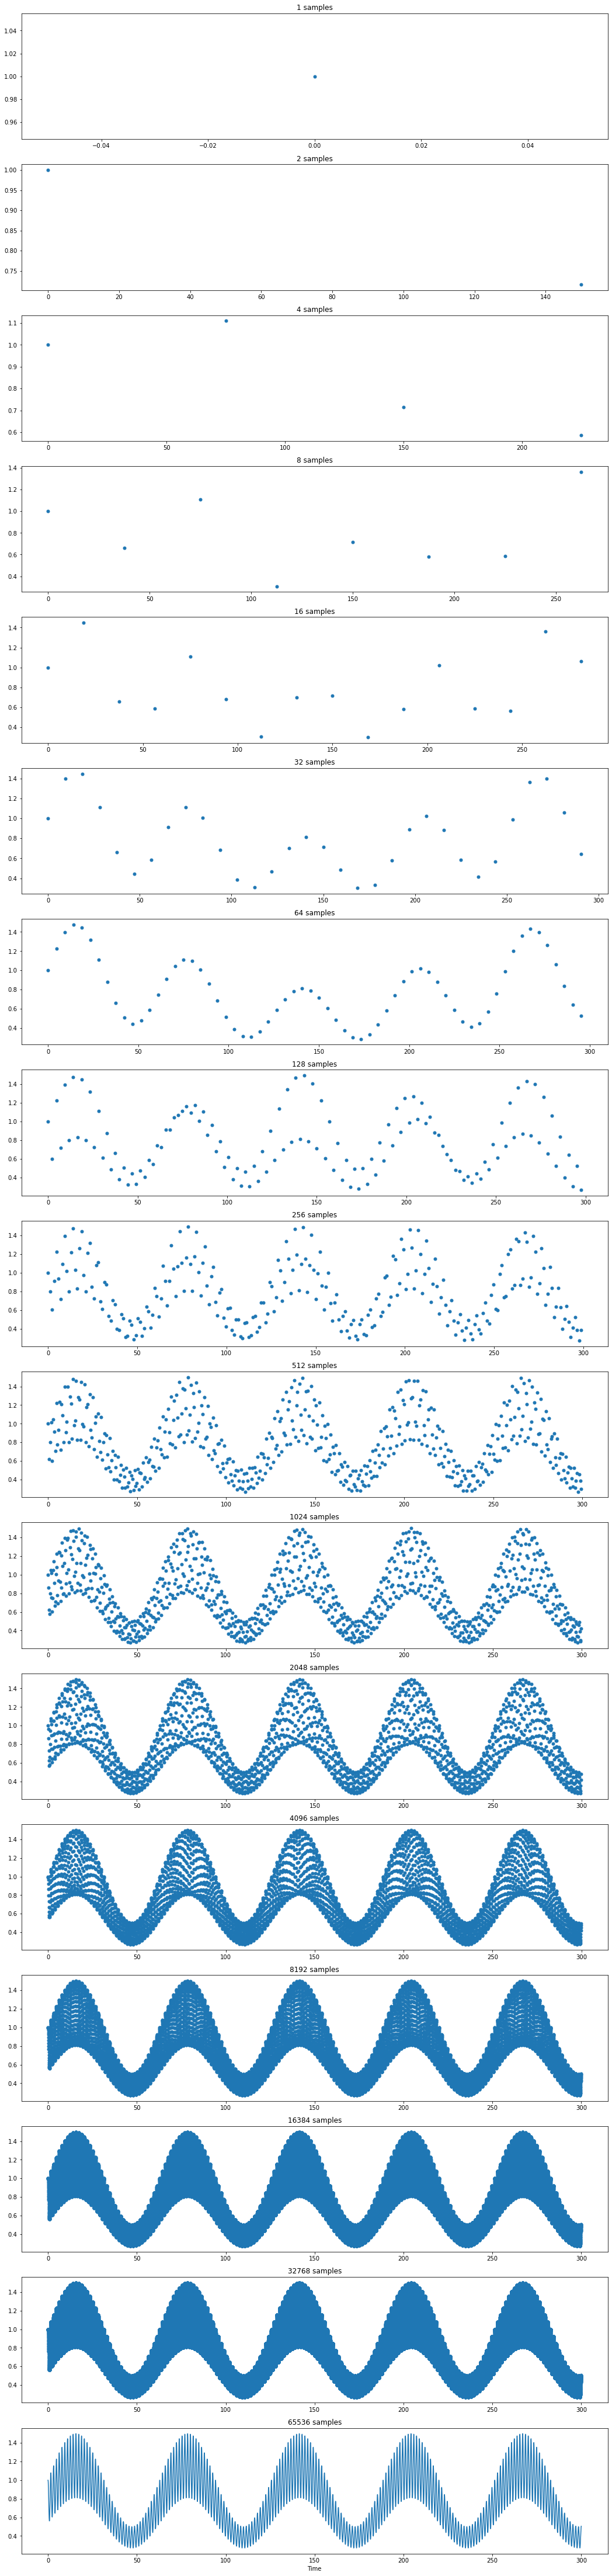

In [147]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def myfun(t, f1=0.1, f2=2):
    return (1 + 0.5*np.sin(f1*t))*(np.cos(np.sin(f2*t)))

T = 300
J = 16

fig, ax = plt.subplots(J+1, 1, figsize=(18, 5*J))
for j in range(J):
    t = np.linspace(0, T, 2**j, endpoint=False)
    ax[j].plot(t, myfun(t), '.', ms=10)
    ax[j].set_title(f"{len(t)} samples")
    
ax[-1].plot(t, myfun(t))
ax[-1].set_title(f"{2**N} samples")
ax[-1].set_xlabel('Time')

Carefully look over the different ways that sampling can go wrong ...

* Aliasing .. different signals are indistinguishable when sampled. (Look at the N = 128 chart above ... can you see a signal that is not evident at the highest resolution?)

Other examples:

* [Levitating helicopter](https://youtu.be/yr3ngmRuGUc)
* [Wagon Wheel Effect](https://youtu.be/QOwzkND_ooU)
* [4 degree Graphene](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Moire_of_twisted_bilayer_graphene.svg/357px-Moire_of_twisted_bilayer_graphene.svg.png)

## Reconstruction

Given a series of N samples $y[n] = y(n\delta)$, $n = 0, 1, \ldots N-1$, reconstruct a continuous function.

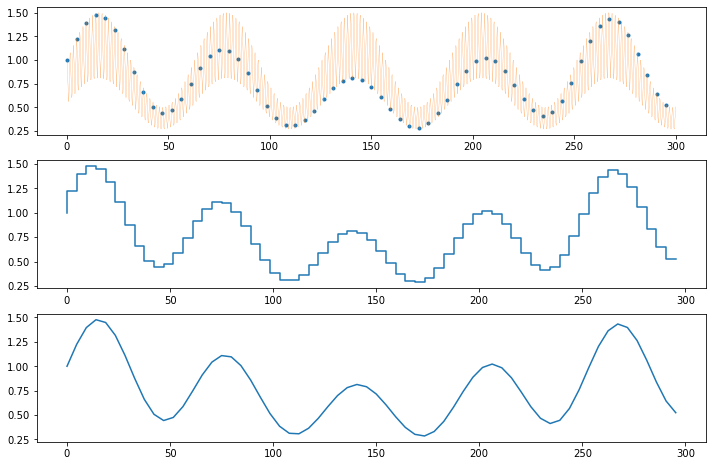

In [157]:
T = 300
N = 64

# sampling
t = np.linspace(0, T, N, endpoint=False)
x = myfun(t)

# create plots
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

# original signal
ax[0].plot(t, x, '.')
t2 = np.linspace(0, T, 10000)
ax[0].plot(t2, myfun(t2), lw=.2)

# step interpolation
ax[1].step(t, x, where="pre")

# linear interpolation
ax[2].plot(t, x)

### Anti-aliasing

What we have to do is eliminate that part of the signal that gets aliased **before** the sampling. Because if don't, the aliasing corrupts the signal in ways that can't be fixed afterwards.


## Fourier Analysis

### Complex sinusoids as an Orthonormal Basis

Fourier analysis begins with specification of a set of countably infinite set of complex valued basis functions for the interval $[0, T]$

$$\phi_k(t) = e^{2\pi i k t/T}$$

for integer $k \in (-\infty, \infty)$. Letting $\bar{phi}_k$ denote the complex conjugate of $\phi_k$, note that $\bar{\phi}_k = \phi_{-k}$

For functions $f$ and $g$ defined on the same interval, define the inner product

$$\langle f, g \rangle = \frac{1}{T}\int_0^T \bar{f}(t) g(t)\ dt$$

where $\bar{f}(t)$ denotes the complex conjugate of $f(t)$. It's easy to show the set $\phi_k(t)$ forms an orthonormal basis under this inner product. First

\begin{align*}
\langle \phi_k, \phi_k\rangle & = \frac{1}{T} \int_0^T \bar{\phi}_k(t) \phi_k(t)\ dt \\
& = \frac{1}{T} \int_0^T e^{-2\pi i k t/T} e^{2\pi i k t/T}\ dt \\
& =  \frac{1}{T} \int_0^T dt = 1\\
\end{align*}

Then second, for $k \ne l$,

\begin{align*}
\langle \phi_k, \phi_l\rangle & = \frac{1}{T} \int_0^T \bar{\phi}_k(t) \phi_l(t)\ dt \\
& = \frac{1}{T} \int_0^T e^{-2\pi i k t/T} e^{2\pi i l t/T}\ dt \\
& = \frac{1}{T} \int_0^T e^{2\pi i (l-k)t/T}\ dt \\
& =  \frac{e^{2\pi i (l-k)t/T}}{2\pi i(l-k)}\bigg|_0^T =  \frac{e^{2\pi i (l-k)} - 1}{2\pi i(l-k)} = 0 \qquad \text{for } k\ne l
\end{align*}

Next we consider projecting a function $y$ of $t$ on the interval $[0, T]$ onto this orthonormal basis.

$$y = \sum_{k=-\infty}^{\infty} Y_k \phi_k$$

where $Y_k$ are the coefficients of expansion. The coeffients are determined 

\begin{align*}
\langle \phi_k, y\rangle & = \langle \phi_k, \sum_{k'} Y_{k'}\phi_{k'} \rangle  = \sum_{k'} Y_{k'}\langle \phi_k, \phi_{k'} \rangle = Y_k
\end{align*}

or in closed form as

$$Y_k = \frac{1}{T} \int_0^T e^{-2\pi i k t/T} y(t)\ dt$$

which computes the **Fourier Transform** of $y(t)$ at a countably infinite set of values $Y_k$.

### Application to Real functions

For real functions $\bar{y}(t) = y(t)$. As a consequence

\begin{align*}
\sum_k \overline{Y_k \phi_k} & = \sum_{k'} Y_{k'} \phi_{k'} \\
\sum_k \bar{Y}_k \bar{\phi}_k & = \sum_{k'} Y_{k'} \phi_{k'} \\
\sum_k \bar{Y}_k \phi_{-k} & = \sum_{k'} Y_{k'} \phi_{k'} \\
\end{align*}

Projecting the left and right hand sides of this equation on the orthonomal basis shows $\bar{Y}_k = Y_{-k}$ for real functions.

The practical consequence of this is that is not necessary to compute the Fourier coefficients for negative values of $k$.

### Frequency domain interpretation

The indices $k$ can be associated with a frequency $f_k$ where

$$f_k  = \frac{k}{T}$$

has units of cycles per unit time. The Fourier coefficients can then be associated with a frequency 

$$Y(w_k) = Y_k = \frac{1}{T} \int_0^T e^{-2\pi i f_k t} y(t)\ dt$$

where $f_k = \frac{k}{T}$ for $k = 0, \pm 1, \pm 2, \ldots$


### Application to Sampled data

In most applications the function $f(t)$ is evaluated at regular intervals of time $t_n = n\delta$. For $k = 0, \pm 1, \pm 2, \ldots$ 

\begin{align*}
Y_k & = \frac{1}{T} \int_0^T e^{-2\pi i k t/ T}y(t)\ dt \\
& \approx \frac{1}{N\delta} \sum_{n=0}^{N-1} e^{-2\pi i k n  \delta / (N\delta)} y_n\delta \\
& \approx \frac{1}{N} \sum_{n=0}^{N-1} e^{-2\pi i k n / N} y_n
\end{align*}

## numpy.fft

The Numpy library provides a collection of functions to enable use of the Fourier tranform.

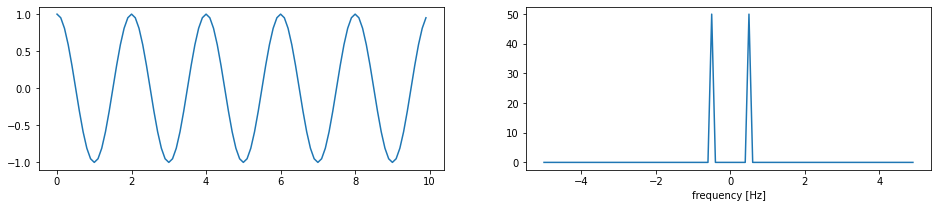

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# create time interval and grid
T = 10
N = 100
t = np.linspace(0, T, N, endpoint=False)

# create a function of time
f = lambda t: np.cos(2*np.pi*t*5/T)

def fftplot(ax, t, y):
    F = fft(y)
    w = fftfreq(len(t), np.mean(np.diff(t)))
    s = np.argsort(w)
    ax.plot(w[s], np.abs(F[s]))
    ax.set_xlabel("frequency [Hz]")
    
fig, ax = plt.subplots(1, 2, figsize=(16, 3))
ax[0].plot(t, f(t))
fftplot(ax[1], t, f(t))

## Examples of Fourier Transforms

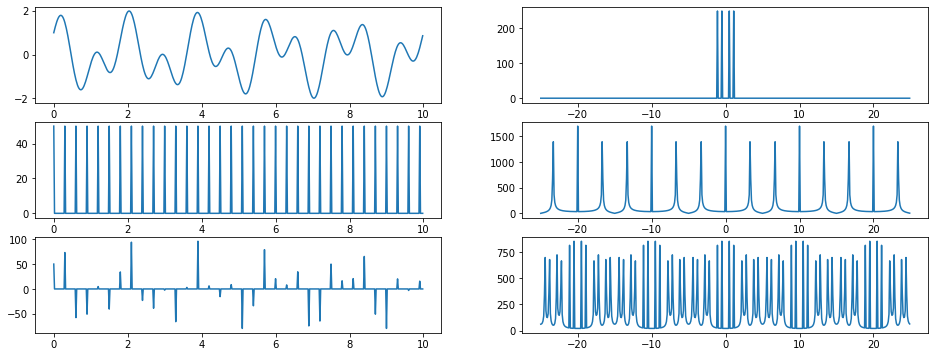

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fftplot(ax, w, F):
    s = np.argsort(w)
    ax.plot(w[s], np.abs(F[s]))

from scipy.fft import fft, ifft, fftfreq

def showfft(t_sample):

    # time horizon and sample period
    T = 10
    dt = 0.02
    t = np.linspace(0, T, int(T/dt), endpoint=False)

    # function
    k = 5
    f = lambda t: np.cos(2*np.pi*t*k/T) + np.sin(2*np.pi*t*(k+6)/T)

    def delta(t, t_sample):
        k = int(t_sample/dt)
        return [1/dt if 0 ==  n % k else 0 for n in range(len(t))]

    # compute FFT

    F = fft(f(t))
    w = fftfreq(len(F), dt)

    fig, ax = plt.subplots(3, 2, figsize=(16, 6))
    ax[0, 0].plot(t, f(t))
    fftplot(ax[0, 1], w, F)

    g = delta(t, t_sample)
    G = fft(g)
    ax[1, 0].plot(t, g)
    fftplot(ax[1, 1], w, G)

    h = f(t)*delta(t, t_sample)
    H = fft(h)
    ax[2, 0].plot(t, h)
    fftplot(ax[2, 1], w, H)
    
showfft(0.3)

In [ ]:
x = np.zeros(N)
n = np.array(range(0, N))
x[8] = 1

y = fft(x)
k = n

fix, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(n, x, '.', ms=10)
ax[1].plot(k, np.abs(y), ms=10)
ax[1].set_title('Fourier Transform')

ax[2].plot(y.real, y.imag, '.')
ax[2].axis("equal")
ax[2].axis("square")

fig.tight_layout()

## Euler's Formula

$$e^{2\pi ix} = \cos\left(2\pi x\right) + i \sin\left(2\pi x\right)$$

## Sinusoidal signals

The complex function

$$

## Discrete Fourier Transform


The Fourier transform is a linear operation $y = \cal{F}(x)$ where

\begin{align*}
y[k] & = \sum_{n=0}^{N-1}e^{-\frac{2\pi}{N} i k n} x[n] \\
\text{or} \\
y[k] & = \sum_{n=0}^{N-1}\left[\cos\left(\frac{2\pi}{N}kn\right) - i \sin\left(\frac{2\pi}{N}kn\right)\right]x[n]
\end{align*}

Each term corresponds to a frequency $f_{k} = \frac{k}{N}$



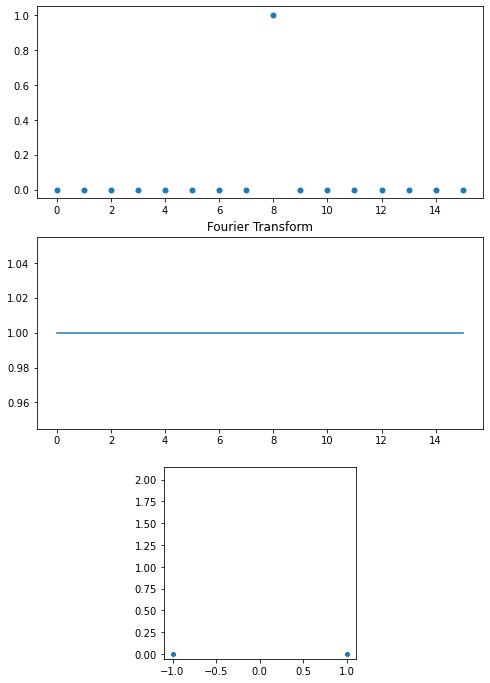

In [166]:
from scipy.fft import fft, ifft

N = 16
x = np.zeros(N)
n = np.array(range(0, N))
x[8] = 1

y = fft(x)
k = n

fix, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(n, x, '.', ms=10)
ax[1].plot(k, np.abs(y), ms=10)
ax[1].set_title('Fourier Transform')

ax[2].plot(y.real, y.imag, '.')
ax[2].axis("equal")
ax[2].axis("square")

fig.tight_layout()

## Inverse Discrete Fourier Transform

The inverse transform is given by 

$$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}e^{2\pi i k n/N} y[k]$$

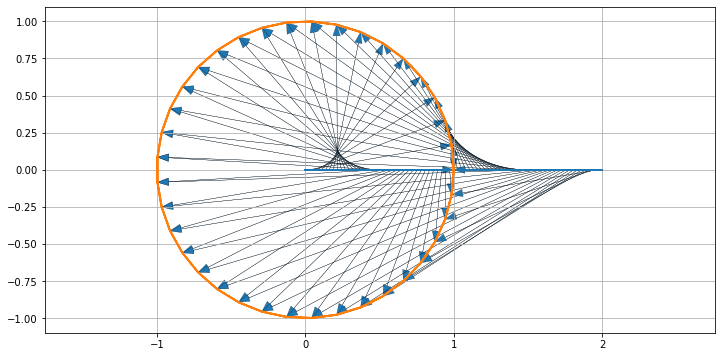

In [111]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# create points on the postive x axis
x = np.linspace(0, 2, 75) + 0j
y = np.exp(1j * x * 2 * np.pi)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(x.real, x.imag, lw=2)
ax.plot(y.real, y.imag, lw=2)

for k in range(len(x)):
    plt.arrow(x[k].real, x[k].imag, y[k].real-x[k].real, y[k].imag-x[k].imag,
             head_width=0.05,length_includes_head=True, lw=.2)
    
ax.axis('equal')
ax.grid(True)

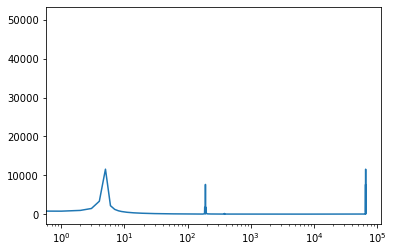

In [70]:
from scipy.fft import fft, ifft

t = np.linspace(0, T, 2**J)
y = fft(x(t))
plt.semilogx(abs(y))